In [1]:
import numpy as np # library for data structures, vectors, matrices and mathematical functions
import matplotlib.pyplot as plt                   # library for plotting and visual representation
import matplotlib.transforms as transform                   # library for plotting and visual representation
from matplotlib import rcParams                   # module handling generic plot parameters
from matplotlib.ticker import (FormatStrFormatter)# module for figure axis formatting
import pandas as pd                               # data administration, here used for data import
from scipy.optimize import curve_fit              # fitting algorithm from the scipy package
from IPython.display import display as dy, Markdown as md, Latex as Lx, Image as Im, HTML as hm # displaying LaTeX code in code cells
import sympy as sp
import os
import tabulate
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.rcParams.update({'font.size': 12,
                     'axes.titlesize': 18,
                     'axes.labelsize': 16,
                     'axes.labelpad': 14,
                     'lines.linewidth': 1,
                     'lines.markersize': 15,
                     'xtick.labelsize' : 16,
                     'ytick.labelsize' : 16,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',
                     'figure.figsize': (10,6),
                    })

plt.rcParams['axes.facecolor'] = 'black' 
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['axes.titlecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['xtick.labelcolor'] = 'white'
plt.rcParams['ytick.labelcolor'] = 'white'
plt.rcParams['legend.labelcolor'] = 'white'
plt.rcParams['grid.color'] = '#707070'
plt.rcParams['axes.titlepad'] = 20
legendfontsize=12

ip = get_ipython()
ibe = ip.configurables[-1]
ibe.figure_formats = { 'pdf', 'png'}

# E11e Phase Shift in AC Circuits

Group #13

NG Kuok Fung | #3797903 

Edgar Harutyunyan | #3775171

**Overview of Tasks**

**1.**  Measure the phase shift $\phi$ between current and voltage as a function of frequency $f$ for

**1a.**  an RLC series circuit,

**1b.** an RC series circuit,

**1c.** an RL series circuit.

**2.** Analysis

**2a.** Plot the phase shifts of the three circuits in one graph.

**2b.** Determine the series resistance $R$ from the phase shift of the RC-series circuit.

**2c.** Determine the inductance $L$ of the coil

**i.** from the resonance frequency $f_0$ of the RLC series circuit

**ii.** by fitting of the phase shift of the RL series circuit.

**2d.** Fit the phase shift $\phi$ of the RLC series circuit treating the resistance $R$ as a fitting parameter.

In [2]:
# GLOBALS
#task_1_title_str = ['0', '30', '45'] # Degrees
#phi_l = [0, -np.pi/6, np.pi/4]
data_dir = './data/'

def fit_and_plot(df, x_col, y_col, xlabel, ylabel, title, fit_func=None, legend_labels=None):
    # Plot the scatter data
    plt.scatter(df[x_col], df[y_col], color='#ADD8E6', marker='x', label='Data')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    
    if fit_func is not None:
        # Perform non-linear regression using curve_fit
        x = df[x_col].values
        y = df[y_col].values
        params, cov_mat = curve_fit(fit_func, x, y)
        
        # Plot the fitted curve
        x_fit = np.linspace(min(x), max(x), 100)
        y_fit = fit_func(x_fit, *params)
        plt.plot(x_fit, y_fit, color='red', label='Fitted Curve')
    
    # Customize the legend if labels are provided
    if legend_labels is not None:
        plt.legend(legend_labels)
    else:
        plt.legend()
    
    plt.show()
    
    if fit_func is not None:
        return [params, cov_mat]
    else:
        return None
    
  

## Task 1:  Measurement of phase shift $\phi$

***Task Definition*** 

Measure the phase shift $\phi$ between current and voltage as a function of frequency $f$ for an RLC, RL and RC series circuit.

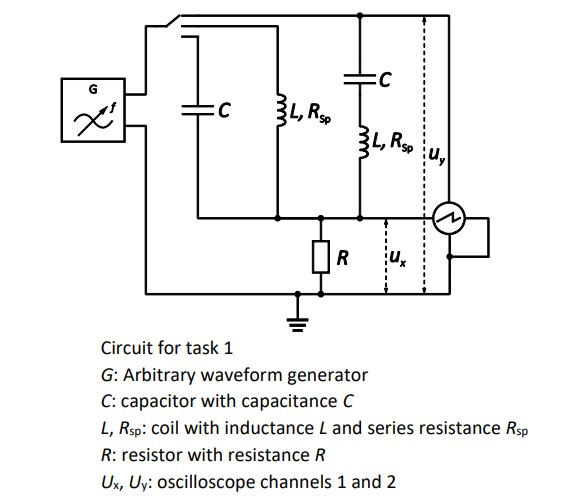

<IPython.core.display.Latex object>

In [3]:
dy(Im("./img/CD.jpg", height=100, width=500))
dy(Lx(r'$Figure\, 1.1$: Series RLC,RL and RC Circuit Diagram'))

***Procedure***

1. The RLC, RL and RC Series Circuits were setup according to the circuit diagram in **Fig 1.1**.
<br>

2. 
<br>

3. 
<br>

4.  


## Task 2: Analysis

### Task 2a: Plot the phase shifts of the three circuits in one graph.


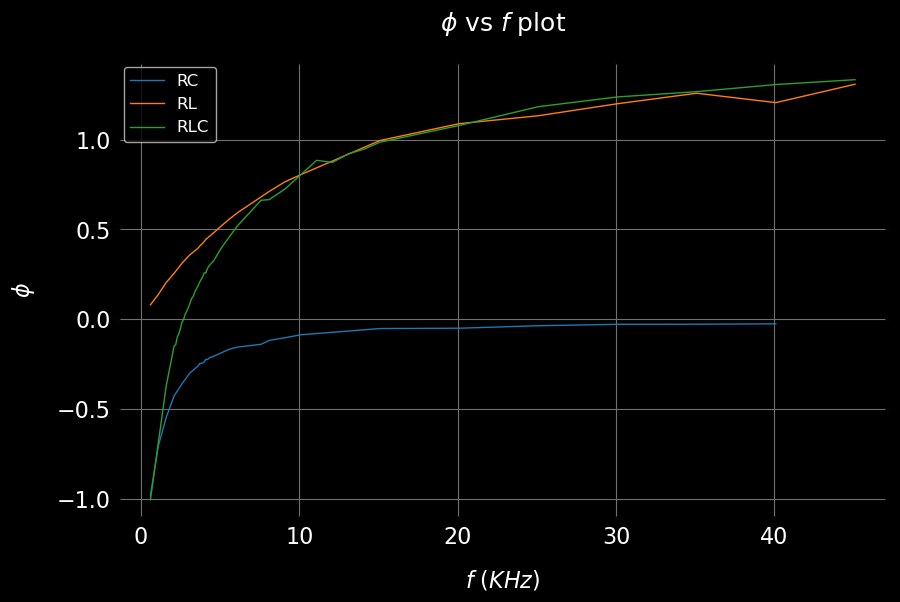

<IPython.core.display.Latex object>

In [4]:
series_path = data_dir 
df_l = []
R_d_l = []
phi_l = []
f_l = []

for path in os.listdir(series_path):
    file_path = os.path.join(series_path,path)
    if os.path.isfile(file_path): 
        all_sheets = pd.read_excel(file_path, sheet_name=None)
        for sheet_name, df in all_sheets.items():
            df = df.dropna()
            # Optionally filter out rows where a specific column value is less than 2001
            # df.drop(df[df.iloc[:,1] < 2001].index, inplace=True)
            df.sort_values(by=df.columns[2])
            f_l.append(np.array(df.iloc[:, 2]))
            phi_l.append(np.array(df.iloc[:, 4]))
            df_l.append(df)
            R_d_l.append(sheet_name)

sorted_lists = sorted(zip(R_d_l, f_l, phi_l, df_l), key=lambda x: x[0])
R_d_l, f_l, phi_l, df_l = zip(*sorted_lists)

if f_l and phi_l and R_d_l:
    for f, phi, label in zip(f_l, phi_l, R_d_l[:]):  # Skip the first 3 elements of R_d_l (['RL', 'RC', 'RLC'])
        plt.plot(f, phi, label=label)
    

plt.xlabel(r'$f$ ($KHz$)')
plt.ylabel(r'$\phi$')
plt.title(r'$\phi$ vs $f$ plot')
plt.legend()
plt.grid(True)
plt.show()
dy(Lx(r'$Figure\, 1.1 $: Phase Shift Curve'))

### Task 2b:  RC-series circuit analysis

***Task Definition*** 

Determine the series resistance $R$ from the phase shift of the RC-series circuit.


***Theoretical Basis*** 

$$Z = R+ iX_T$$

$$Im(Z) = X_T~~~~,~~~~~ Re(Z) = R$$

$$X_T = X_L -X_C$$

$$X_L=\omega L = 2\pi f L$$

$$X_C=\frac{1}{\omega C}= \frac{1}{2\pi f C}$$

$$\tan{\phi} = \frac{Im(Z)}{Re(Z)} = \frac{\omega L - \frac{1}{\omega C}}{R} \label{eq2.1} \tag{2.1}$$

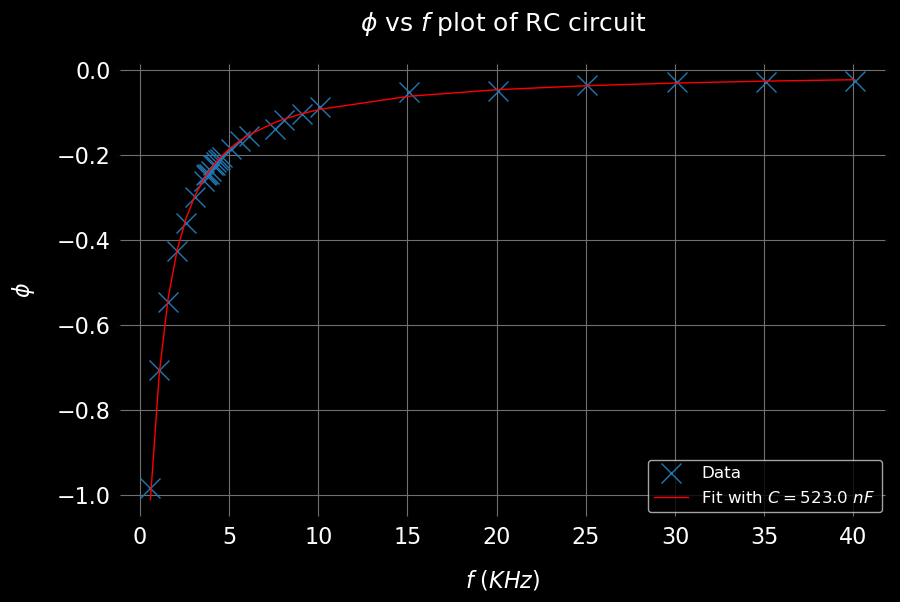

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [5]:
C = 0.523e-6 # F
u_C = 0.5e-9 # F
u_f = 50 # Hz

def phi(f, R):
    global C
    return np.arctan(-1/(2 * np.pi * f * C * R))

x_data = f_l[0]*1e3 #(KHZ -> Hz)
y_data = phi_l[0]
[R_fit], cov_mat = curve_fit(phi,x_data,y_data, method='lm')                                
y_fit = phi(x_data, R_fit)
#tan_y_fit = tan_phi(x_data, R_fit, C_fit)
#y_fit = np.arctan(tan_y_fit)
u_R_fit = np.sqrt(cov_mat[0][0])
#u_C_fit = np.sqrt(cov_mat[1][1])
#print(R_fit, C_fit,L_fit, cov_mat)
plt.plot(x_data*1e-3, y_data, 'x', label='Data')  # Plot the data points    
plt.plot(x_data*1e-3, y_fit, 'r', label=f'Fit with $C={C*1e9:.1f} ~n F$')  # Plot the fitted curve

plt.xlabel(r'$f$ ($KHz$)')
plt.ylabel(r'$\phi$')
plt.title('$\phi$ vs $f$ plot of RC circuit')
plt.legend()
plt.grid(True)
plt.show()
dy(Lx(r'$Figure\, 1.2 $: RC Fit'))
dy(Lx(r'$$R = (%.2f \pm %.3f) ~\Omega$$' %(R_fit, u_R_fit)))

### Task 2c: 

***Task Definition*** 

Determine the inductance $L$ of the coil

**i.** from the resonance frequency $f_0$ of the RLC series circuit

**ii.** by fitting of the phase shift of the RL series circuit.

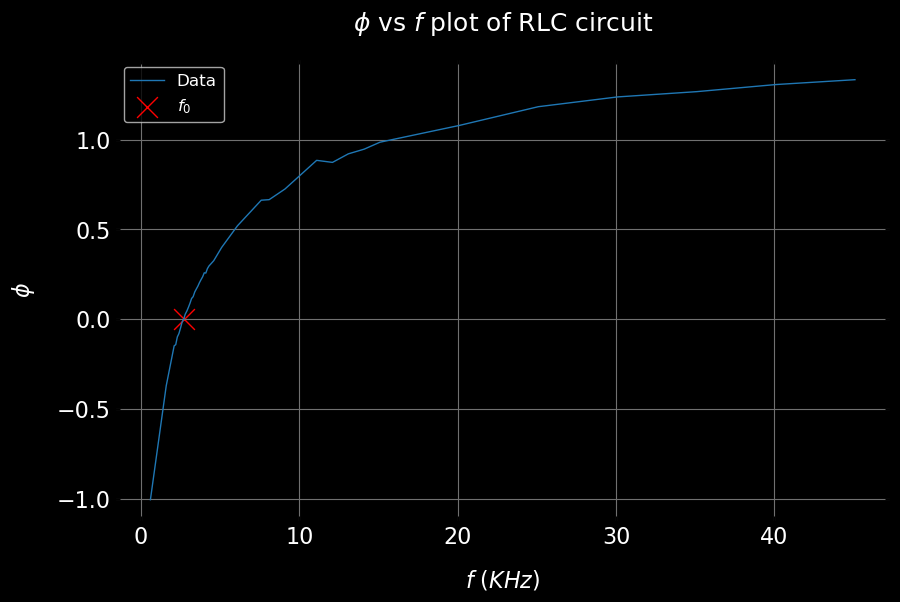

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [6]:
x_data = f_l[2]*1e3 #(KHZ -> Hz)
y_data = phi_l[2]
ind = np.where(y_data == 0)[0][0]
f_0 = x_data[ind]
L_i = 1/((2*np.pi*f_0)**2 * C)
u_L_i = np.sqrt((2*L_i/f_0*u_f)**2 + (L_i/C*u_C)**2)
plt.plot(x_data*1e-3, y_data, label='Data')  # Plot the data points    
plt.scatter(f_0*1e-3, y_data[ind], color='r',label=r'$f_0$', marker='x')
plt.xlabel(r'$f$ ($KHz$)')
plt.ylabel(r'$\phi$')
plt.title('$\phi$ vs $f$ plot of RLC circuit')
plt.legend()
plt.grid(True)
plt.show()
dy(Lx(r'$Figure\, 1.3 $: RLC data plot'))
dy(Lx(r"Using Thomson's equation: "))
dy(Lx(r'$$L = \frac{1}{(2\pi f_0)^2 C} = (%.2f \pm %.3f) ~mH$$' % (L_i*1e3, u_L_i*1e3)))

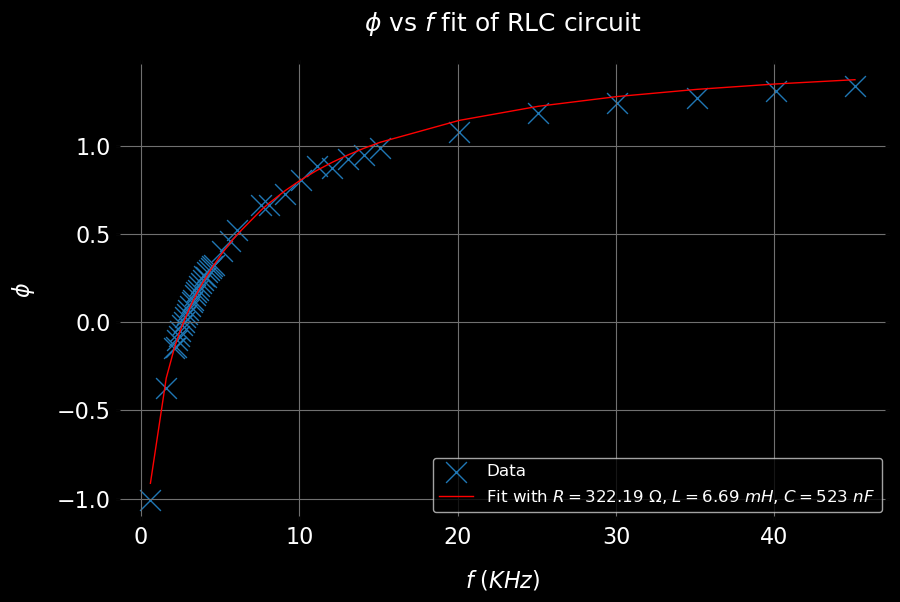

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [7]:
R = R_fit
L = L_i

def phi(f, R_sp):
    global R, L, C
    return np.arctan((2 * np.pi * f * L - 1/(2 * np.pi * f * C)) / (R + R_sp))
    
x_data = f_l[2]*1e3 #(KHZ -> Hz)
y_data = phi_l[2]
[R_sp_fit], cov_mat = curve_fit(phi,x_data,y_data, method = 'lm')
u_R_sp = np.sqrt(cov_mat[0][0])
y_fit = phi(x_data, R_sp_fit)
plt.scatter(x_data*1e-3, y_data, label='Data', marker='x')  # Plot the data points    
plt.plot(x_data*1e-3, y_fit, color='r',label=(r'Fit with $R = %.2f ~\Omega$, $L = %.2f ~mH$, $C = %.f ~nF$' % (R, L_i*1e3, C*1e9)))
plt.xlabel(r'$f$ ($KHz$)')
plt.ylabel(r'$\phi$')
plt.title('$\phi$ vs $f$ fit of RLC circuit')
plt.legend()
plt.grid(True)
plt.show()
dy(Lx(r'$Figure\, 1.4 $: Fitting RLC circuit in order to estimate $R_{sp}$ resistance.'))
dy(Lx(r'$$R_{sp} = (%.2f \pm %.3f) ~\Omega$$' % (R_sp_fit, u_R_sp)))

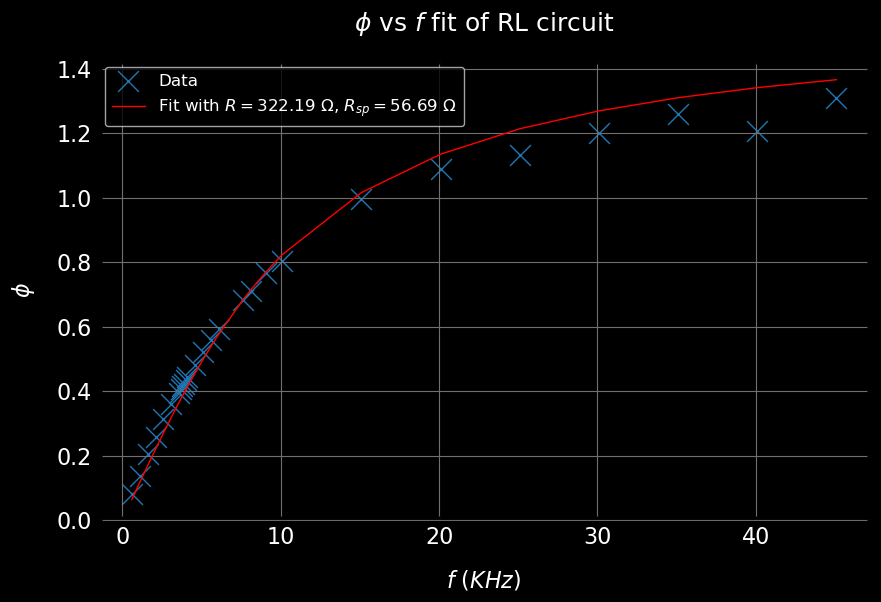

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [8]:
R = R_fit
R_sp = R_sp_fit # Ohm

def phi(f, L):
    global R, R_sp
    return np.arctan(2 * np.pi * f * L / (R + R_sp))
    
x_data = f_l[1]*1e3 #(KHZ -> Hz)
y_data = phi_l[1]
[L_ii], cov_mat = curve_fit(phi,x_data,y_data, method = 'lm')
u_L_ii = np.sqrt(cov_mat[0][0])
y_fit = phi(x_data, L_ii)
plt.scatter(x_data*1e-3, y_data, label='Data', marker='x')  # Plot the data points    
plt.plot(x_data*1e-3, y_fit, color='r',label=(r'Fit with $R = %.2f ~\Omega$, $R_{sp} = %.2f ~\Omega$' % (R, R_sp)))
plt.xlabel(r'$f$ ($KHz$)')
plt.ylabel(r'$\phi$')
plt.title('$\phi$ vs $f$ fit of RL circuit')
plt.legend()
plt.grid(True)
plt.show()
dy(Lx(r'$Figure\, 1.4 $: Fitting RL circuit.'))
dy(Lx(r'$$L = (%.2f \pm %.3f) ~mH$$' % (L_ii*1e3, u_L_ii*1e3)))

### Task 2d: 

***Task Definition*** 

Fit the phase shift $\phi$ of the RLC series circuit treating the resistance $R$ as a fitting parameter.

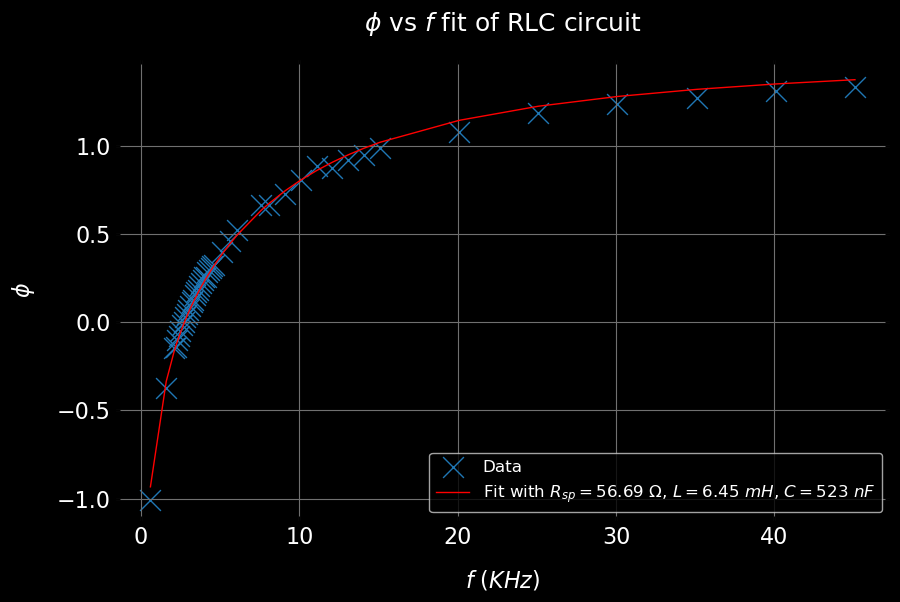

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [9]:
R_sp = R_sp_fit
L = L_ii

def phi(f, R):
    global R_sp, L, C
    return np.arctan((2 * np.pi * f * L - 1/(2 * np.pi * f * C)) / (R + R_sp))
    
x_data = f_l[2]*1e3 #(KHZ -> Hz)
y_data = phi_l[2]
[R_ii_fit], cov_mat = curve_fit(phi,x_data,y_data, method = 'lm')
u_R_ii_fit = np.sqrt(cov_mat[0][0])
y_fit = phi(x_data, R_ii_fit)
plt.scatter(x_data*1e-3, y_data, label='Data', marker='x')  # Plot the data points    
plt.plot(x_data*1e-3, y_fit, color='r',label=(r'Fit with $R_{sp} = %.2f ~\Omega$, $L = %.2f ~mH$, $C = %.f ~nF$' % (R_sp, L*1e3, C*1e9)))
plt.xlabel(r'$f$ ($KHz$)')
plt.ylabel(r'$\phi$')
plt.title('$\phi$ vs $f$ fit of RLC circuit')
plt.legend()
plt.grid(True)
plt.show()
dy(Lx(r'$Figure\, 1.4 $: Fitting RLC circuit in order to estimate $R_{sp}$ resistance.'))
dy(Lx(r'$$R = (%.2f \pm %.3f) ~\Omega$$' % (R_ii_fit, u_R_ii_fit)))

***References***

1) [E11e Lab instruction](https://moodle2.uni-leipzig.de/pluginfile.php/3621562/mod_resource/content/1/E11e_2024.pdf)
